# Uber Fare Prediction using Regression Models

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## Read the data

In [5]:
train_data = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\Hackathon\sample_train.csv")

test_data = pd.read_excel(r"C:\Users\CR GAYATHRI\Desktop\Hackathon\sample_test_without_target.xlsx")

In [6]:
train_data.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [7]:
test_data.head()

Unnamed: 0  Unnamed: 0.1                 key          pickup_datetime  \
0       37338      31401407 2011-02-10 19:06:00  2011-02-10 19:06:00 UTC   
1      160901      33158465 2011-06-23 09:24:00  2011-06-23 09:24:00 UTC   
2       40428      10638355 2012-07-14 10:37:00  2012-07-14 10:37:00 UTC   
3       63353       3836845 2014-10-19 22:27:05  2014-10-19 22:27:05 UTC   
4      165491      27114503 2015-05-25 22:54:43  2015-05-25 22:54:43 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.951662        40.790710         -73.947570         40.756220   
1        -73.951007        40.771508         -73.974075         40.763553   
2        -73.996473        40.747930         -73.990298         40.756152   
3        -73.997934        40.716890         -73.952617         40.727149   
4        -73.952583        40.714039         -73.906128         40.711281   

   passenger_count  
0                1  
1                1  
2                6  
3                1  
4                1

## Investigating DataFrame

In [8]:
train_data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
train_data.shape

(200000, 9)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed: 0           200000 non-null int64
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [11]:
train_data.describe()

Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407         40.733823         1.000000  
50%           -73.980093         40.753042         1.000000  
75%           -73.963658         40.768001         2.000000  
max          1153.572603        872.697628       208.000000

In [12]:
train_data.corr()

Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000589          0.000230        -0.000341   
fare_amount          0.000589     1.000000          0.010457        -0.008481   
pickup_longitude     0.000230     0.010457          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002257     0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002257  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.774787          0.702367        -0.001560  
dropoff_longitude           1.000000         -0.917010         0.000033  
dropoff_latitude           -0.917010          1.000000        -0.000659  
passenger_count             0.000033         -0.000659         1.000000

In [13]:
plt.figure(figsize = (15,7))

sns.heatmap(data = train_data.corr(), annot = True, cmap = 'rainbow')

plt.show();

In [14]:
#sns.pairplot(train_data);

# Variable Analysis

In [15]:
train_data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [16]:
train_data["pickup_datetime"]=pd.to_datetime(train_data['pickup_datetime'])

In [17]:
train_data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [18]:
train_data.dropna(inplace=True)

In [19]:
train_data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [20]:
sns.distplot(train_data.fare_amount); 

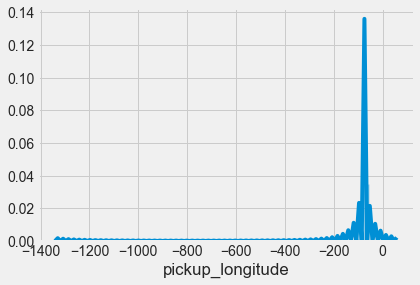

In [21]:
sns.distplot(train_data.pickup_longitude);

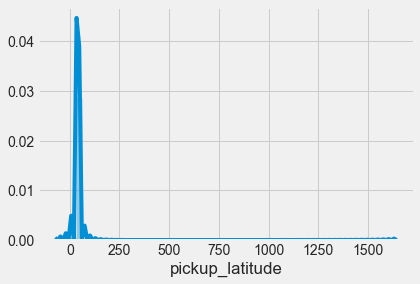

In [22]:
sns.distplot(train_data.pickup_latitude); 

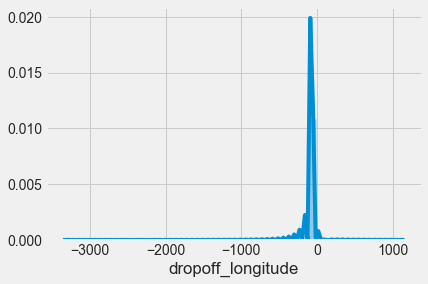

In [23]:
sns.distplot(train_data.dropoff_longitude);

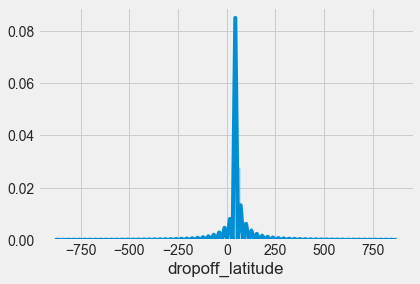

In [24]:
sns.distplot(train_data.dropoff_latitude); 

In [25]:
print("drop_off latitude min value",test_data["dropoff_latitude"].min())
print("drop_off latitude max value",test_data["dropoff_latitude"].max())
print("drop_off longitude min value", test_data["dropoff_longitude"].min())
print("drop_off longitude max value",test_data["dropoff_longitude"].max())
print("pickup latitude min value",test_data["pickup_latitude"].min())
print("pickup latitude max value",test_data["pickup_latitude"].max())
print("pickup longitude min value",test_data["pickup_longitude"].min())
print("pickup longitude max value",test_data["pickup_longitude"].max())

drop_off latitude min value -74.0011069999999
drop_off latitude max value 47.433332
drop_off longitude min value -1491.194073
drop_off longitude max value 40.796262
pickup latitude min value -74.001047
pickup latitude max value 42.46842
pickup longitude min value -80.734728
pickup longitude max value 40.812005


In [26]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=47.433332

In [27]:
tempdf=train_data[(train_data["dropoff_latitude"]<min_latitude) | (train_data["pickup_latitude"]<min_latitude) | (train_data["dropoff_longitude"]<min_longitude) | (train_data["pickup_longitude"]<min_longitude) | (train_data["dropoff_latitude"]>max_latitude) | (train_data["pickup_latitude"]>max_latitude) | (train_data["dropoff_longitude"]>max_longitude) | (train_data["pickup_longitude"]>max_longitude) ]
print("before droping",train_data.shape)
train_data.drop(tempdf.index,inplace=True)
print("after droping",train_data.shape)

before droping (199999, 9)
after droping (199968, 9)


In [28]:
train_data=train_data[train_data['fare_amount']>0]

In [29]:
train_data.shape

(199946, 9)

In [30]:
train_data['key'] = pd.to_datetime(train_data['key'], format = "%Y/%m/%d %H:%M:%S")

In [31]:
train_data['DayOfWeekNum'] = train_data['key'].dt.dayofweek
train_data['Day'] = train_data['key'].dt.weekday_name
train_data['MonthDayNum'] = train_data['key'].dt.day
train_data['Hours'] = train_data['key'].dt.hour

In [32]:
train_data.head()

Unnamed: 0                           key  fare_amount  \
0    24238194 2015-05-07 19:52:06.000000300          7.5   
1    27835199 2009-07-17 20:04:56.000000200          7.7   
2    44984355 2009-08-24 21:45:00.000000610         12.9   
3    25894730 2009-06-26 08:22:21.000000100          5.3   
4    17610152 2014-08-28 17:47:00.000000188         16.0   

            pickup_datetime  pickup_longitude  pickup_latitude  \
0 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  DayOfWeekNum  \
0         -73.999512         40.723217                1             3   
1         -73.994710         40.750325                1             4   
2         -73.962565         40.772647                1             0   
3         -73.965316         40.803349                3             4   
4         -73.973082         40.761247                5             3   

        Day  MonthDayNum  Hours  
0  Thursday            7     19  
1    Friday           17     20  
2    Monday           24     21  
3    Friday           26      8  
4  Thursday           28     17

In [33]:
train_data.drop(['Day'], inplace = True, axis = 1)

In [34]:
train_data.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [35]:
train_data.head()

key  fare_amount           pickup_datetime  \
0 2015-05-07 19:52:06.000000300          7.5 2015-05-07 19:52:06+00:00   
1 2009-07-17 20:04:56.000000200          7.7 2009-07-17 20:04:56+00:00   
2 2009-08-24 21:45:00.000000610         12.9 2009-08-24 21:45:00+00:00   
3 2009-06-26 08:22:21.000000100          5.3 2009-06-26 08:22:21+00:00   
4 2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  DayOfWeekNum  MonthDayNum  Hours  
0                1             3            7     19  
1                1             4           17     20  
2                1             0           24     21  
3                3             4           26      8  
4                5             3           28     17

In [36]:
# key and pickup_datetime columns are not required as we have created other variables which are extracted from them

train_data.drop(['key','pickup_datetime'], axis = 1, inplace = True)

In [37]:
train_data.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  DayOfWeekNum  MonthDayNum  Hours  
0         40.723217                1             3            7     19  
1         40.750325                1             4           17     20  
2         40.772647                1             0           24     21  
3         40.803349                3             4           26      8  
4         40.761247                5             3           28     17

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199946 entries, 0 to 199999
Data columns (total 9 columns):
fare_amount          199946 non-null float64
pickup_longitude     199946 non-null float64
pickup_latitude      199946 non-null float64
dropoff_longitude    199946 non-null float64
dropoff_latitude     199946 non-null float64
passenger_count      199946 non-null int64
DayOfWeekNum         199946 non-null int64
MonthDayNum          199946 non-null int64
Hours                199946 non-null int64
dtypes: float64(5), int64(4)
memory usage: 15.3 MB


## Model Building

### Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
x = train_data.drop(['fare_amount'], axis =1)
y = train_data['fare_amount']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [42]:
lr_model =LinearRegression()

In [43]:
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
test_pred = lr_model.predict(x_test)

train_pred = lr_model.predict(x_train)

In [45]:
print(r2_score(y_train,train_pred))

print(r2_score(y_test,test_pred))

0.0007694661644713774
0.0005523832551626029


In [46]:
np.sqrt(mean_squared_error(y_train,train_pred))

np.sqrt(mean_squared_error(y_test,test_pred))

9.912364803436152

9.816881011741595

## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
train_pred = dt.predict(x_train)

test_pred = dt.predict(x_test)

In [51]:
r2_score(y_train,train_pred)

r2_score(y_test,test_pred)

0.994884937600229

0.5161657488667737

In [52]:
np.sqrt(mean_squared_error(y_train,train_pred))

np.sqrt(mean_squared_error(y_test,test_pred))

0.7092019103661464

6.830331992045347

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfc1 = RandomForestRegressor()

In [54]:
rfc1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
train_pred = rfc1.predict(x_train)

test_pred = rfc1.predict(x_test)

In [56]:
r2_score(y_train,train_pred)

r2_score(y_test,test_pred)

0.9444649031425215

0.7357868261160807

In [57]:
np.sqrt(mean_squared_error(y_train,train_pred))

np.sqrt(mean_squared_error(y_test,test_pred))

2.336835790269108

5.047435091171096

# Model tuning for Test Data

In [58]:
test_data.head()

Unnamed: 0  Unnamed: 0.1                 key          pickup_datetime  \
0       37338      31401407 2011-02-10 19:06:00  2011-02-10 19:06:00 UTC   
1      160901      33158465 2011-06-23 09:24:00  2011-06-23 09:24:00 UTC   
2       40428      10638355 2012-07-14 10:37:00  2012-07-14 10:37:00 UTC   
3       63353       3836845 2014-10-19 22:27:05  2014-10-19 22:27:05 UTC   
4      165491      27114503 2015-05-25 22:54:43  2015-05-25 22:54:43 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.951662        40.790710         -73.947570         40.756220   
1        -73.951007        40.771508         -73.974075         40.763553   
2        -73.996473        40.747930         -73.990298         40.756152   
3        -73.997934        40.716890         -73.952617         40.727149   
4        -73.952583        40.714039         -73.906128         40.711281   

   passenger_count  
0                1  
1                1  
2                6  
3                1  
4                1

In [59]:
test_data.shape

(50000, 9)

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
Unnamed: 0           50000 non-null int64
Unnamed: 0.1         50000 non-null int64
key                  50000 non-null datetime64[ns]
pickup_datetime      50000 non-null object
pickup_longitude     50000 non-null float64
pickup_latitude      50000 non-null float64
dropoff_longitude    50000 non-null float64
dropoff_latitude     50000 non-null float64
passenger_count      50000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.4+ MB


In [61]:
test_data['key'] = pd.to_datetime(test_data['key'], format = "%Y/%m/%d %H:%M:%S")

In [62]:
test_data['DayOfWeekNum'] = test_data['key'].dt.dayofweek
test_data['Day'] = test_data['key'].dt.weekday_name
test_data['MonthDayNum'] = test_data['key'].dt.day
test_data['Hours'] = test_data['key'].dt.hour

In [63]:
test_data.head()

Unnamed: 0  Unnamed: 0.1                 key          pickup_datetime  \
0       37338      31401407 2011-02-10 19:06:00  2011-02-10 19:06:00 UTC   
1      160901      33158465 2011-06-23 09:24:00  2011-06-23 09:24:00 UTC   
2       40428      10638355 2012-07-14 10:37:00  2012-07-14 10:37:00 UTC   
3       63353       3836845 2014-10-19 22:27:05  2014-10-19 22:27:05 UTC   
4      165491      27114503 2015-05-25 22:54:43  2015-05-25 22:54:43 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.951662        40.790710         -73.947570         40.756220   
1        -73.951007        40.771508         -73.974075         40.763553   
2        -73.996473        40.747930         -73.990298         40.756152   
3        -73.997934        40.716890         -73.952617         40.727149   
4        -73.952583        40.714039         -73.906128         40.711281   

   passenger_count  DayOfWeekNum       Day  MonthDayNum  Hours  
0                1             3  Thursday           10     19  
1                1             3  Thursday           23      9  
2                6             5  Saturday           14     10  
3                1             6    Sunday           19     22  
4                1             0    Monday           25     22

In [64]:
test_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'key', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'DayOfWeekNum', 'Day',
       'MonthDayNum', 'Hours'],
      dtype='object')

In [65]:
test_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'key', 'pickup_datetime','Day'], inplace = True, axis = 1)

In [66]:
test_data.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.951662        40.790710         -73.947570         40.756220   
1        -73.951007        40.771508         -73.974075         40.763553   
2        -73.996473        40.747930         -73.990298         40.756152   
3        -73.997934        40.716890         -73.952617         40.727149   
4        -73.952583        40.714039         -73.906128         40.711281   

   passenger_count  DayOfWeekNum  MonthDayNum  Hours  
0                1             3           10     19  
1                1             3           23      9  
2                6             5           14     10  
3                1             6           19     22  
4                1             0           25     22

## Random Forest Regressor

In [67]:
x = test_data

In [68]:
dt_test = RandomForestRegressor()

In [69]:
dt_test.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
test_data['Predicted_Fare'] = dt_test.predict(x)

In [71]:
test_data.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.951662        40.790710         -73.947570         40.756220   
1        -73.951007        40.771508         -73.974075         40.763553   
2        -73.996473        40.747930         -73.990298         40.756152   
3        -73.997934        40.716890         -73.952617         40.727149   
4        -73.952583        40.714039         -73.906128         40.711281   

   passenger_count  DayOfWeekNum  MonthDayNum  Hours  Predicted_Fare  
0                1             3           10     19            9.94  
1                1             3           23      9            9.93  
2                6             5           14     10            6.32  
3                1             6           19     22           10.50  
4                1             0           25     22           11.64

## Coverting to csv file

In [72]:
test_data.to_csv("Test_Pred_Fare.csv")